###### PROJECT: INVESTIGATING A DATASET- IMDB MOVIE DATASET FROM KAGGLE

###### INTRODUCTION
The IMDB data set contains information about 10,000 movies collected from The Movie Database (TMDB), including user ratings and revenue. Certain columns like 'cast', and 'genres' contain multipe values separated by pipe '|' characters. The final two columns ending with '_adj' show the budget and revenue of the associated movie in terms of 2010 dollars accounting for inflation over time.

###### QUESTIONS TO BE ANSWERED
1. Movies with the highest vote average
2. Most popular genre from year to year
3. Production companies with the highest revenue made
4. Most popular actors
5. What years produced the highest revenue
6. Directors with the most number of movies

In [2]:
# Import neccessary libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8) #Adjusts the configuration of the plots we will create

In [65]:
# Read in the data

df = pd.read_csv(r"C:\Users\SAMUEL\Documents\Udacity Data\tmdb-movies.csv")
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


The IMDB data set have been stored with the variable name 'df'. This shows the first 5 rows of the data.

###### DATA WRANGLING
The first step is to check the shape of the data set. That is to see the number of rows and columns in the data.

In [43]:
# checking the shape of the data
df.shape

(10866, 21)

As shown above, the total number of rows in the data is 10866, i.e the data contains 10866 IMDB records of movies, and the total number of columns is 21, i.e 21 different features of each movie.

In [4]:
print('imdb data of movies released from year', df['release_year'].min(), 'to', df['release_year'].max())

imdb data of movies released from year 1960 to 2015


In [44]:
# getting some descriptive statistics
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

The .info() method was used to see the characteristics (the count of null values, and the data type) of each column in the dataset. The dataset contains 10866 records but as seen above, some of the columns have a non-null count less than 10866, which means that there are some columns with missing data. 

In [45]:
# showing the count of missing values in each column
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

As seen above, columns like 'overview', 'homepage', 'tagline', 'keywords' among others have a high amount of missing values. Considering that they are not useful to the analysis, it is preferable to drop them. columns like 'budget' and 'budget_adj' are symmetrical in the sense that budget_adj is an adjustment of budgets using 2010 dollar rate. The same applies to 'revenue' and 'revenue_adj', so it is preferable to drop 'budget' and 'revenue' also.

In [66]:
# dropping duplicate data
df.drop_duplicates(inplace=True)
df.shape # original 10866 rows have been reduced to 10865

(10865, 21)

Firstly, we delete any duplicate record in the data. From the above result, the total number of rows have been reduced to 10865. That is 1 record has been removed from the dataset.

In [67]:
# deleting less important columns
df.drop(columns = ['budget', 'revenue', 'homepage', 'overview', 'tagline', 'keywords'], inplace = True)
df.columns

Index(['id', 'imdb_id', 'popularity', 'original_title', 'cast', 'director',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

In [48]:
# checking the number of unique values in each column
df.nunique()
# 

id                      10865
imdb_id                 10855
popularity              10814
original_title          10571
cast                    10719
director                 5067
runtime                   247
genres                   2039
production_companies     7445
release_date             5909
vote_count               1289
vote_average               72
release_year               56
budget_adj               2614
revenue_adj              4840
dtype: int64

note that there are now 10865 rows in the data. From the result above, only id, and imdb_id contain unique values.

In [49]:
# showing the summary statistics
df.describe()

,id,popularity,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10865.000000,10865.000000,10865.000000,10865.000000,10865.000000,10865.000000,1.086500e+04,1.086500e+04
mean,66066.374413,0.646446,102.071790,217.399632,5.975012,2001.321859,1.754989e+07,5.136900e+07
std,92134.091971,1.000231,31.382701,575.644627,0.935138,12.813260,3.430753e+07,1.446383e+08
min,5.000000,0.000065,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.000000,0.207575,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20662.000000,0.383831,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75612.000000,0.713857,111.000000,146.000000,6.600000,2011.000000,2.085325e+07,3.370173e+07
max,417859.000000,32.985763,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


The above statistics is calcualated on numeric features only. From the popularity column, 75% of its values are below or equal to 0.713857 and the maximum value is 32.985763 which indicate the presence of outliers in the column. The next step is to correct the outlier problem in the popularity column.

In [68]:
# correcting outliers in the popularity column
def normalize(col):
    if col < 1:
        return col
    elif col < 10:
        return col/10
    else:
        return col/100
    
df['popularity'] = df['popularity'].apply(normalize)
df['popularity'].describe()

count    10865.000000
mean         0.339257
std          0.231501
min          0.000065
25%          0.154214
50%          0.280055
75%          0.474818
max          0.999866
Name: popularity, dtype: float64

The summary statistics of the popularity column looks evenly distributed now.

Columns like cast, director, genre, and production_companies have values separated by pipe ('|'). This will limit the quality of our analysis. To tackle this problem, a solution will be to use the .split() method to split the values by ',' then explode the data to have record for each of the splitted value. That is the number of rows in the data set will be increased. To avoid this problem, I will create a copy of the dataset.

In [69]:
# creating a copy of the dataframe
df_genre = df.copy()

# splitting  '|'
df_genre['genres'] = df_genre['genres'].str.split('|')

# Exploding the dataset by genres
df_genre = df_genre.explode('genres').reset_index(drop=True)
df_genre.head()

,id,imdb_id,popularity,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,0.329858,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,135397,tt0369610,0.329858,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Adventure,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
2,135397,tt0369610,0.329858,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Science Fiction,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
3,135397,tt0369610,0.329858,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
4,76341,tt1392190,0.284199,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08


Now df_genre contains an exploded version of the original dataset, the genre column have been unitized and now suitable for analysis.

Performing the same operations for cast, director, and production_companies column

In [70]:
# creating a copy of the dataframe
df_cast = df.copy()

# splitting by '|'
df_cast['cast'] = df_cast['cast'].str.split('|')

# Exploding the dataset by cast
df_cast = df_cast.explode('cast').reset_index(drop=True)
df_cast.head()

,id,imdb_id,popularity,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,0.329858,Jurassic World,Chris Pratt,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,135397,tt0369610,0.329858,Jurassic World,Bryce Dallas Howard,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
2,135397,tt0369610,0.329858,Jurassic World,Irrfan Khan,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
3,135397,tt0369610,0.329858,Jurassic World,Vincent D'Onofrio,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
4,135397,tt0369610,0.329858,Jurassic World,Nick Robinson,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09


In [71]:
# creating a copy of the dataframe
df_dir = df.copy()

# splitting by '|'
df_dir['director'] = df_dir['director'].str.split('|')

# Exploding the dataset by director
df_dir = df_dir.explode('director').reset_index(drop=True)
df_dir.head()

,id,imdb_id,popularity,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,0.329858,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,0.284199,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,0.131125,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,0.111731,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,0.933501,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [72]:
# creating a copy of the dataframe
df_company = df.copy()

# splitting by '|'
df_company['production_companies'] = df_company['production_companies'].str.split('|')

# Exploding the dataset by production_companies
df_company = df_company.explode('production_companies').reset_index(drop=True)
df_company.head()

,id,imdb_id,popularity,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,0.329858,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,135397,tt0369610,0.329858,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Amblin Entertainment,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
2,135397,tt0369610,0.329858,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Legendary Pictures,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
3,135397,tt0369610,0.329858,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Fuji Television Network,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
4,135397,tt0369610,0.329858,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Dentsu,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09


With several data wrangling operations, the imdb movie dataset is now ready for analysis

###### EXPLORATORY DATA ANALYSIS
In this section, we are going to explore the data set to discover relationships, trends, or patterns in the dataset

array([[<AxesSubplot:title={'center':'id'}>,
        <AxesSubplot:title={'center':'popularity'}>,
        <AxesSubplot:title={'center':'runtime'}>],
       [<AxesSubplot:title={'center':'vote_count'}>,
        <AxesSubplot:title={'center':'vote_average'}>,
        <AxesSubplot:title={'center':'release_year'}>],
       [<AxesSubplot:title={'center':'budget_adj'}>,
        <AxesSubplot:title={'center':'revenue_adj'}>, <AxesSubplot:>]],
      dtype=object)

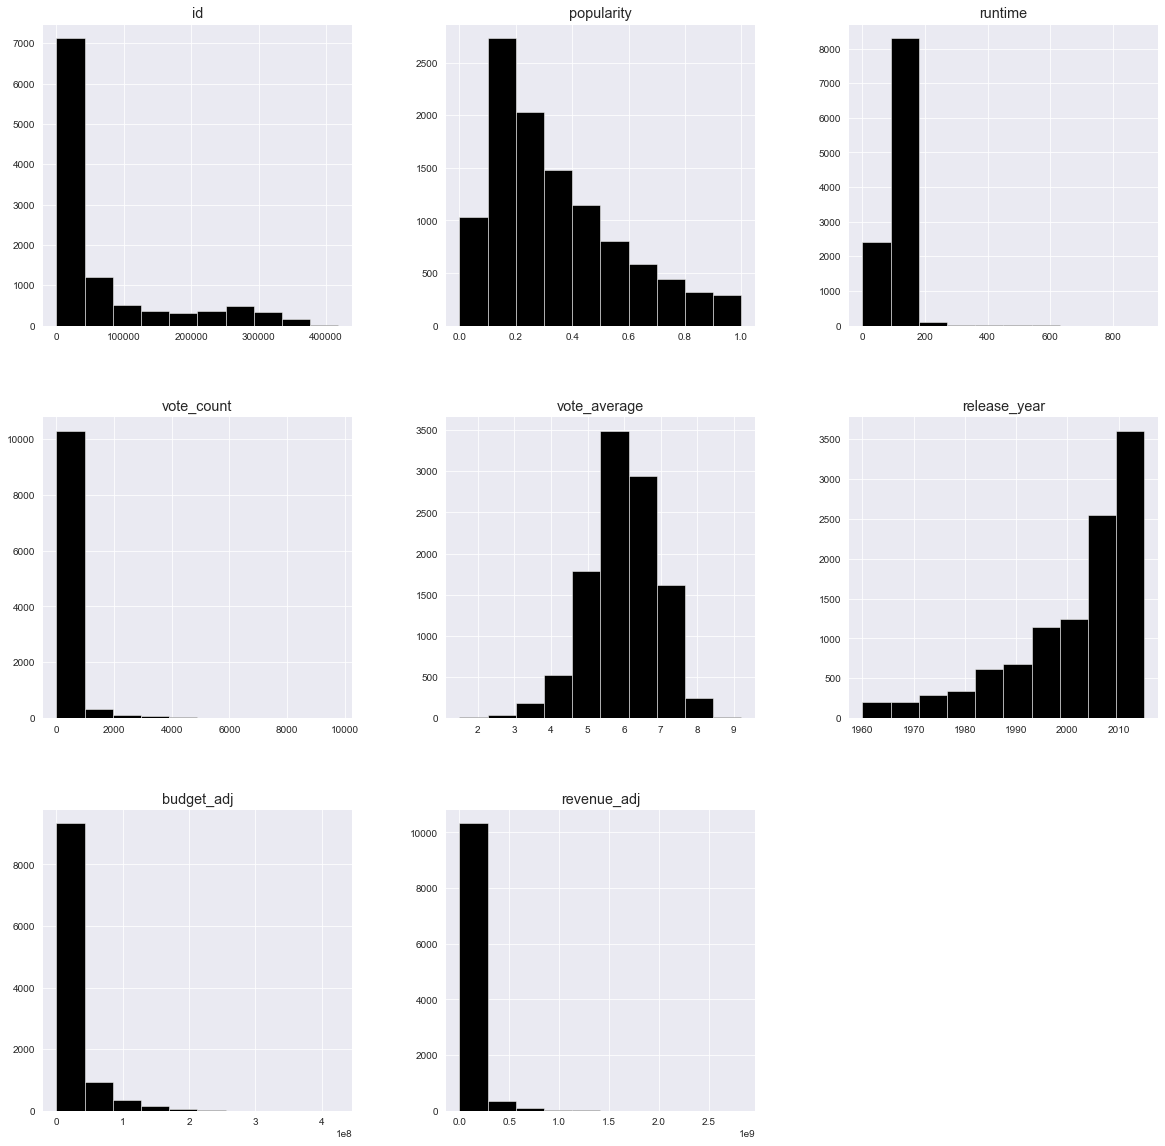

In [73]:
# visualizing the distribution of each columns in the data
sns.set_style('darkgrid')
df.hist(figsize=[20,20], color='black')

from the histogram plots above, here are some key findings:

-The popularity column is right skewed- most of the values fall below 0.6                                                      -Most of the runtime are below 200 minutes                                                                                     
-Most of the vote count are below 1000                                                                                         
-Vote average is normally distributed
-Number of movies released increeases as the year increases                                                                     
-Most movies have budget less than 50,000,000 dollars                                                                           
-Most movies have revenue less than 250,000,000 dollars                                                                         

[Text(0.5, 0, 'Adjusted budget'),
 Text(0, 0.5, 'Adjusted revenue'),
 Text(0.5, 1.0, 'Relationship between budget and revenue')]

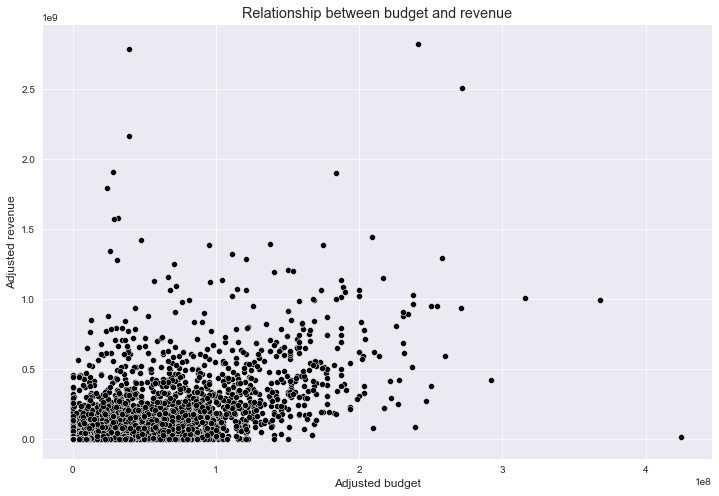

In [59]:
# creating a scatter plot to see the relationship between budget and revenue
ax = sns.scatterplot(data=df, y='revenue_adj', x='budget_adj', color='black')
ax.set(xlabel='Adjusted budget', ylabel='Adjusted revenue', title='Relationship between budget and revenue')

From the above plot, we can see that there is a positive correlation between budget and revenue which means as budget increases, so will revenue, and vice versa.

Now to answer some questions such as 'which movies have the highest vote_average?'

In [74]:
# Top 10 movies with the highest vote_average
df.sort_values(by='vote_average', ascending=False).head(10)

,id,imdb_id,popularity,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
3894,125336,tt2044056,0.006925,The Story of Film: An Odyssey,Mark Cousins|Jean-Michel Frodon|Cari Beauchamp...,Mark Cousins,900,Documentary,NaN,9/3/11,14,9.2,2011,0.0,0.0
538,224972,tt3983674,0.114264,The Mask You Live In,NaN,Jennifer Siebel Newsom,88,Documentary,NaN,1/1/15,11,8.9,2015,0.0,0.0
1200,374430,tt3973198,0.129531,Black Mirror: White Christmas,Jon Hamm|Rafe Spall|Oona Chaplin|Natalia Tena|...,Carl Tibbetts,74,Drama|Horror|Mystery|Science Fiction|Thriller,NaN,12/16/14,41,8.8,2014,0.0,0.0
2269,51299,tt1828232,0.222293,Life Cycles,NaN,Derek Frankowski,47,Documentary,NaN,10/2/10,27,8.8,2010,0.0,0.0
6911,24970,tt0110758,0.212010,Pink Floyd: Pulse,David Gilmour|Nick Mason|Richard Wright|Sam Br...,David Mallet,145,Music,SMV Enterprises|Columbia Music Video|EMI,7/9/06,23,8.7,2006,0.0,0.0
2401,45644,NaN,0.067753,Opeth: In Live Concert At The Royal Albert Hall,"Mikael Ã…kerfeldt|Martin ""Axe"" Axenrot|Martin ...",NaN,163,Music,NaN,9/21/10,10,8.6,2010,0.0,0.0
3690,68450,tt1646967,0.321341,The Art of Flight,Travis Rice|Nicolas Muller|Mark Landvik|Jake B...,Curt Morgan,80,Adventure|Documentary,Red Bull Media House|Brain Farm Digital Cinema,9/8/11,60,8.5,2011,0.0,0.0
8411,25093,tt1421377,0.302908,Queen - Rock Montreal,Freddie Mercury|Roger Taylor|John Deacon|Brian...,Saul Swimmer,138,Music,Edel records GmbH,11/24/81,14,8.5,1981,0.0,0.0
8221,55676,tt0112120,0.194889,A Personal Journey with Martin Scorsese Throug...,Martin Scorsese|Brian De Palma|Gregory Peck|Fr...,Martin Scorsese|Michael Henry Wilson,225,Documentary,Miramax Films|British Film Institute (BFI),5/21/95,11,8.5,1995,0.0,0.0
8839,16275,tt0251654,0.157001,Dave Chappelle: Killin' Them Softly,Dave Chappelle,Stan Lathan,57,Comedy,NaN,1/1/00,17,8.5,2000,0.0,0.0


From the result above, the movie with the highest vote average is 'The Story of Film: An Odyssey' with a vote average of 9.2.

In [75]:
# genre with the highest sum of vote_average

df_genre.groupby(['genres']).sum()['vote_average'].sort_values(ascending=False).head(1)

genres
Drama    29348.0
Name: vote_average, dtype: float64

The Drama genre is the genre with the highes sum of vote averages across all year 

In [76]:
# Actor with the most number of movies
df_cast.groupby(['cast']).count()['original_title'].sort_values(ascending=False).head(1)

cast
Robert De Niro    72
Name: original_title, dtype: int64

Robert De Niro has the highest number of movies featured in with a total of 72 number of times he featured in movies.

In [77]:
# checking the count of movies released each year
df['release_year'].value_counts()

2014    700
2013    659
2015    629
2012    588
2011    540
2009    533
2008    496
2010    489
2007    438
2006    408
2005    364
2004    307
2003    281
2002    266
2001    242
2000    227
1999    224
1998    210
1996    204
1997    192
1994    184
1993    178
1995    175
1988    145
1989    137
1991    133
1992    133
1990    132
1987    125
1986    121
1985    109
1984    105
1981     82
1982     81
1983     80
1980     78
1978     65
1977     57
1979     57
1973     55
1971     55
1976     47
1974     47
1966     46
1975     44
1964     42
1970     41
1967     40
1972     40
1968     39
1965     35
1963     34
1960     32
1962     32
1961     31
1969     31
Name: release_year, dtype: int64

The result above shows the number of movies made each year from 1960 to 2015. 2014 saw the highest number with a total of 700 movies made that year, and 1969 saw the least number with 31 movies made.

Text(0, 0.5, 'Number of Movies')

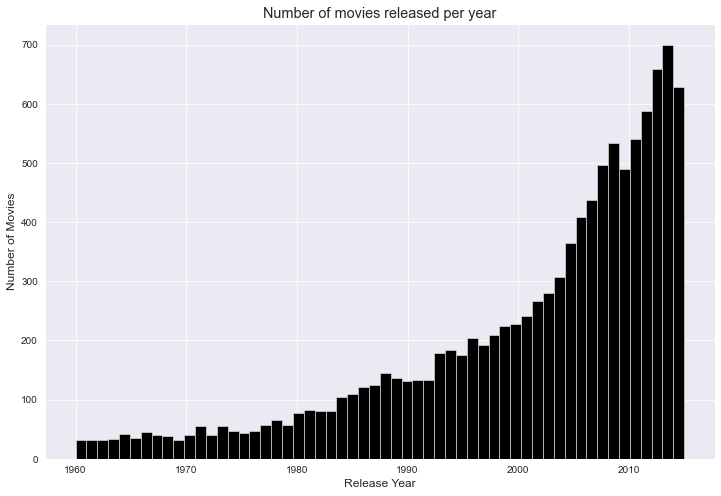

In [79]:
# visualizing the number of movies released each year
sns.histplot(df['release_year'], bins = 56, color='black', alpha=1)
plt.title('Number of movies released per year')
plt.xlabel('Release Year')
plt.ylabel('Number of Movies')

From the visualization above, it is clear that as the year rises, the number of movies made also rises, and vice versa.

In [80]:
# looking at the total revenue made from movies for each year in descending order of revenue
df.groupby(['release_year']).sum()[['revenue_adj']].sort_values(by='revenue_adj', ascending=False)

,revenue_adj
release_year,
2015,2.462144e+10
2012,2.342870e+10
2013,2.312342e+10
2011,2.297046e+10
2009,2.254393e+10
2014,2.241120e+10
2010,2.195903e+10
2007,2.041464e+10
2008,1.968016e+10


Text(0, 0.5, 'Revenue')

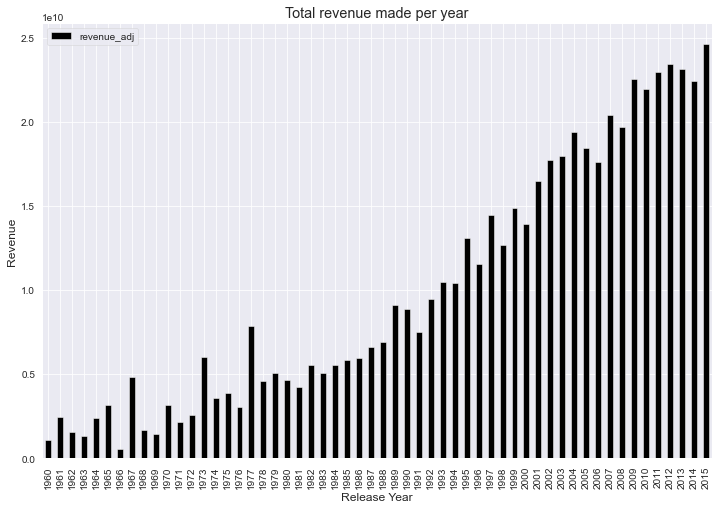

In [24]:
# visualizing the total revenue gotten from movies for each year

rev_viz = df.groupby(['release_year']).sum()[['revenue_adj']]
rev_viz.plot(kind='bar', color='black', alpha=1)
plt.title('Total revenue made per year')
plt.xlabel('Release Year')
plt.ylabel('Revenue')

Also, from the above plot, it is clear that as the year rises, revenues made from movies rises.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'Drama'),
  Text(1, 0, 'Comedy'),
  Text(2, 0, 'Thriller'),
  Text(3, 0, 'Action'),
  Text(4, 0, 'Romance'),
  Text(5, 0, 'Horror'),
  Text(6, 0, 'Adventure'),
  Text(7, 0, 'Crime'),
  Text(8, 0, 'Family'),
  Text(9, 0, 'Science Fiction'),
  Text(10, 0, 'Fantasy'),
  Text(11, 0, 'Mystery'),
  Text(12, 0, 'Animation'),
  Text(13, 0, 'Documentary'),
  Text(14, 0, 'Music'),
  Text(15, 0, 'History'),
  Text(16, 0, 'War'),
  Text(17, 0, 'Foreign'),
  Text(18, 0, 'TV Movie'),
  Text(19, 0, 'Western')])

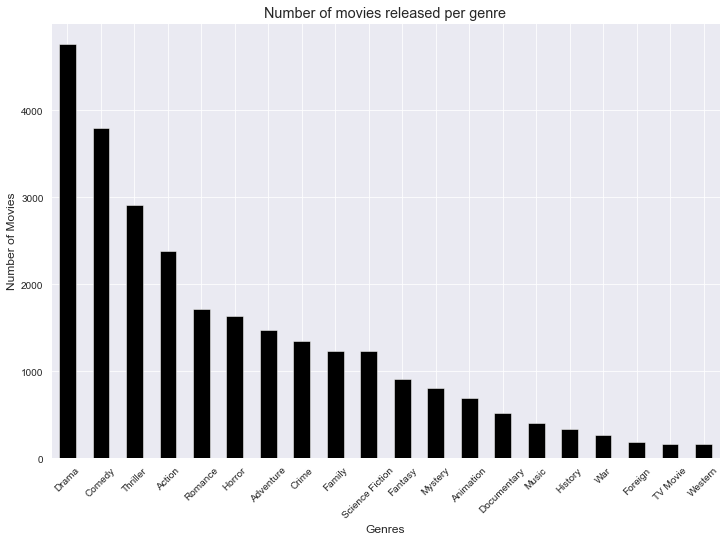

In [81]:
# visualizing top genres according to number of movies released

genre_val = df_genre['genres'].value_counts()
genre_val.plot(kind='bar', color='black')
plt.title('Number of movies released per genre')
plt.xlabel('Genres')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45)

From the above plot, Drama genre has the most number of movies with about 4800 movies with a drama genre followed by genres like Comedy, Thriller, Action. Rare movies have genres as War, Foreign, TV Movie, or Western.

In [82]:
# looking at the top 10 most popular genres throughout the years
df_genre.groupby(['genres']).sum()[['popularity', 'vote_average', 'revenue_adj']].sort_values(by='popularity', ascending=False).head(10)

,popularity,vote_average,revenue_adj
genres,,,
Drama,1697.995268,29348.0,1.923856e+11
Comedy,1306.070265,22398.3,1.816733e+11
Thriller,1075.272743,16717.2,1.607167e+11
Action,856.793931,13798.0,2.187517e+11
Romance,596.044364,10345.4,8.251878e+10
Adventure,527.529004,8738.6,2.084043e+11
Crime,520.887031,8293.1,7.668570e+10
Horror,519.864618,8737.4,3.942340e+10
Family,438.391215,7383.0,1.080039e+11


The most popular genre is Drama, it also have the most vote average. 

In [83]:
# top genres with the most revenue
df_genre.groupby(['genres']).sum()[['popularity', 'vote_average', 'revenue_adj']].sort_values(by='revenue_adj', ascending=False)

,popularity,vote_average,revenue_adj
genres,,,
Action,856.793931,13798.0,2.187517e+11
Adventure,527.529004,8738.6,2.084043e+11
Drama,1697.995268,29348.0,1.923856e+11
Comedy,1306.070265,22398.3,1.816733e+11
Thriller,1075.272743,16717.2,1.607167e+11
Family,438.391215,7383.0,1.080039e+11
Science Fiction,423.073145,6963.0,1.068965e+11
Fantasy,321.676842,5371.0,1.018905e+11
Romance,596.044364,10345.4,8.251878e+10


Though Drama genre has the highest number of movies made, the highest sum of votee averages, and even the most popularity, action genre has made the most revenue from movies with about 219 billion dollars made throughout the years (1960 to 2015). Adventures genre comes second in this list with about 208 billion dollars made throughout the years (1960 to 2015).

In [84]:
# which genres are most popular from year to year?

df_genre.groupby(['release_year', 'genres']).sum()[['popularity']].sort_values(by='popularity', ascending=False)

,,popularity
release_year,genres,
2014,Drama,106.512301
2015,Drama,88.650683
2013,Drama,88.083938
2009,Drama,83.958906
2008,Drama,80.071099
...,...,...
1975,Animation,0.032936
1974,War,0.029670
1973,Documentary,0.021941


2014's Drama genre gained the most popularity. It can be concluded that Drama genre from 2013 to 2015 gained the most popularity.

In [29]:
# movies with a vote_average >= x

x = float(input('check for movies with a vote average greater or equal to: '))
df[['original_title', 'vote_average', 'release_year']][df['vote_average']>=x].sort_values(by='vote_average', ascending=False)

check for movies with a vote average greater or equal to: 8


,original_title,vote_average,release_year
3894,The Story of Film: An Odyssey,9.2,2011
538,The Mask You Live In,8.9,2015
1200,Black Mirror: White Christmas,8.8,2014
2269,Life Cycles,8.8,2010
6911,Pink Floyd: Pulse,8.7,2006
...,...,...,...
4434,Paperman,8.0,2012
4931,The Dream Team,8.0,2012
5209,Tupac: Resurrection,8.0,2003
5611,Doctor Who: The Day of the Doctor,8.0,2013


The above output is the result of movies with a vote average greater or equal to 8.0.

In [30]:
# movies with runtimes >= x

x = float(input('check for movies with a runtime(in mins) greater or equal to: '))
df[['original_title', 'runtime', 'release_year']][df['runtime']>=x].sort_values(by='runtime', ascending=False)

check for movies with a runtime(in mins) greater or equal to: 500


,original_title,runtime,release_year
3894,The Story of Film: An Odyssey,900,2011
4041,Taken,877,2002
2722,Band of Brothers,705,2001
6176,Shoah,566,1985
6181,"North and South, Book I",561,1985
6894,Planet Earth,550,2006
2214,The Pacific,540,2010
3356,John Adams,501,2008
1865,Life,500,2009


Only 9 movies have runtime greater or equal to 500 minutes with 'The Story of Film: An Odyssey' having the highest runtime of 900 minutes, i.e 15 hours

In [86]:
# checking for movies released each year

x = float(input('movies released in what year? (from 1960 to 2015): '))
df[['original_title', 'genres', 'vote_average', 'runtime']][df['release_year']==x].sort_values(
    by='vote_average', ascending=False)

movies released in what year? (from 1960 to 2015): 2010


,original_title,genres,vote_average,runtime
2269,Life Cycles,Documentary,8.8,47
2401,Opeth: In Live Concert At The Royal Albert Hall,Music,8.6,163
2334,Rush: Beyond the Lighted Stage,Documentary|Music,8.4,107
2397,The Making of The Walking Dead,Documentary,8.4,30
2313,Tick Tock Tale,Animation,8.3,6
...,...,...,...,...
2157,Titanic II,Action|Adventure|Thriller,2.7,90
2258,2010: Moby Dick,Action|Adventure|Drama|Horror|Science Fiction,2.5,87
2298,Slow Torture Puke Chamber,Horror,2.4,75
2280,Mega Shark vs. Crocosaurus,Action|Horror|Science Fiction,2.4,90


The output above shows the result movies made in 2010 in a descending order of their vote average.

In [87]:
# top 10 Production companies with the highest revenue

df_company.groupby(['production_companies']).sum()[['revenue_adj', 'popularity', 'vote_average']].sort_values(by='revenue_adj', ascending=False).head(10)

,revenue_adj,popularity,vote_average
production_companies,,,
Warner Bros.,7.104849e+10,198.650172,3139.8
Universal Pictures,6.432196e+10,189.126363,3169.7
Paramount Pictures,5.746967e+10,167.246523,2649.9
Twentieth Century Fox Film Corporation,5.224729e+10,111.612196,1724.6
Walt Disney Pictures,3.738639e+10,83.615001,1321.7
Columbia Pictures,3.326200e+10,102.397945,1639.0
New Line Cinema,2.307678e+10,88.303837,1296.2
Amblin Entertainment,2.129924e+10,23.659133,416.6
Metro-Goldwyn-Mayer (MGM),2.042822e+10,81.289558,1319.3


From the above result, Warner Bros. company has made the most revenue from movies with about 71 billion dollars made throughout the years (1960 to 2015), It is also the most popular company. Second on this list is the Universal Pictures company which has seen about 64 billion dollars made in revenue

In [88]:
# top Directors with the highest movie count
df_dir.groupby(['director']).count()[['id']].sort_values(by='id', ascending=False)

,id
director,
Woody Allen,46
Clint Eastwood,34
Martin Scorsese,31
Steven Spielberg,30
Ridley Scott,23
...,...
Janet Grillo,1
Jang Hoon,1
Janusz Kaminski,1


Woody Allen directed Movies the most number of times with a total of 46 movies directed by him. Chris Eastwood, Martin, and Steven are also notable directors with many movies to their name.

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'Woody Allen'),
  Text(1, 0, 'Clint Eastwood'),
  Text(2, 0, 'Martin Scorsese'),
  Text(3, 0, 'Wes Craven'),
  Text(4, 0, 'Steven Soderbergh'),
  Text(5, 0, 'Ridley Scott'),
  Text(6, 0, 'Stephen Frears'),
  Text(7, 0, 'Oliver Stone')])

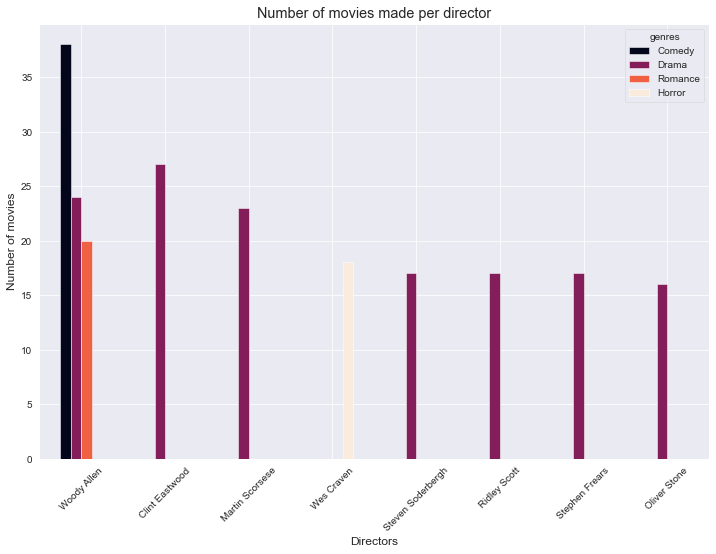

In [90]:
# visualizing top 10 directors according to number of movies made per genre
dir_viz = df_genre.groupby(['director', 'genres'])['id'].count().sort_values(ascending=False)[:10].unstack()
dir_viz.plot(kind='bar', cmap='rocket', alpha=1)
plt.title('Number of movies made per director')
plt.xlabel('Directors')
plt.ylabel('Number of movies')
plt.xticks(rotation=45)

From the above plot, Woody Allen has made the highest count of movies directed, with the highest number in Comedy, followed by Chris Eastwood in Drama, followed by Woody Allen in Drama. Oliver Stone in Drama saw the least out of the top 10 highest count.

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Robert De Niro'),
  Text(1, 0, 'Samuel L. Jackson'),
  Text(2, 0, 'Bruce Willis'),
  Text(3, 0, 'Nicolas Cage'),
  Text(4, 0, 'Michael Caine'),
  Text(5, 0, 'Robin Williams'),
  Text(6, 0, 'John Cusack'),
  Text(7, 0, 'John Goodman'),
  Text(8, 0, 'Morgan Freeman'),
  Text(9, 0, 'Susan Sarandon')])

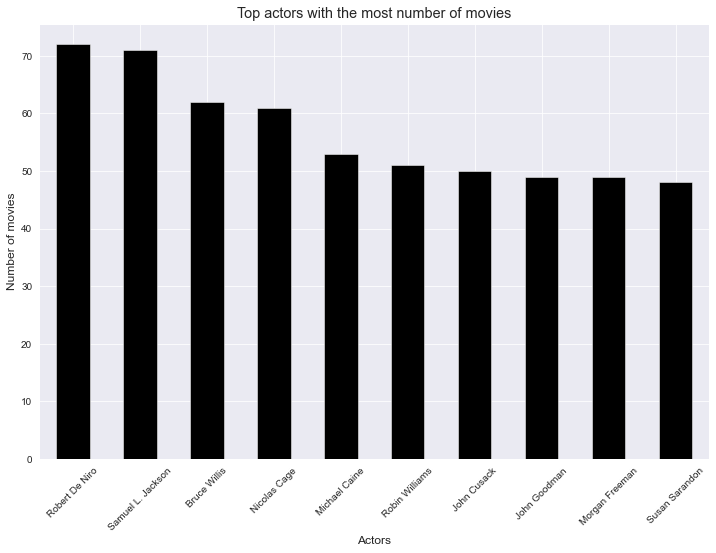

In [91]:
# visualizing top 10 Actors with the most number of movies
top_act = df_cast['cast'].value_counts().sort_values(ascending=False).head(10)
top_act.plot(kind='bar', color='black')
plt.title('Top actors with the most number of movies')
plt.xlabel('Actors')
plt.ylabel('Number of movies')
plt.xticks(rotation=45)

Robert De Niro has featured in movies the most, followed by Samuel L. Jackson, other notable actors are Bruce wills, Nicolas Cage, among others

In [92]:
# Top 10 most popular actors

df_cast.groupby(['cast']).sum()[['popularity', 'vote_count']].sort_values('popularity', ascending=False)[:10]

,popularity,vote_count
cast,,
Samuel L. Jackson,32.345755,45097
Robert De Niro,27.859647,31504
Bruce Willis,26.696706,44526
Nicolas Cage,23.961692,22799
Susan Sarandon,22.316623,6176
Morgan Freeman,21.281194,32240
Michael Caine,20.606896,40043
John Cusack,20.585318,11528
Clint Eastwood,20.485717,7366


From the output above, Samuel L. Jackson is the most popular actor. He is also the actor with the most vote count.


###### CHECKING FOR RELATIONSHIPS BETWEEN FEATURES
In this section I will be performing correlation analysis on the features of this data set. Firstly, let's see a correlation matrix that displays the strength of association between various features of the data set 

In [93]:
# looking at correlations
df.corr()

,id,popularity,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
id,1.000000,-0.099782,-0.088368,-0.035555,-0.058391,0.511393,-0.189008,-0.138487
popularity,-0.099782,1.000000,0.050094,0.067307,0.025039,-0.000731,0.105045,0.055008
runtime,-0.088368,0.050094,1.000000,0.163273,0.156813,-0.117187,0.221127,0.175668
vote_count,-0.035555,0.067307,0.163273,1.000000,0.253818,0.107962,0.587062,0.707941
vote_average,-0.058391,0.025039,0.156813,0.253818,1.000000,-0.117576,0.093079,0.193062
release_year,0.511393,-0.000731,-0.117187,0.107962,-0.117576,1.000000,0.016771,-0.066236
budget_adj,-0.189008,0.105045,0.221127,0.587062,0.093079,0.016771,1.000000,0.646627
revenue_adj,-0.138487,0.055008,0.175668,0.707941,0.193062,-0.066236,0.646627,1.000000


From the above result, we can see strong positive correlations between budget and revenue, vote_count and budget, let's use visuals to make relationships easily discoverable

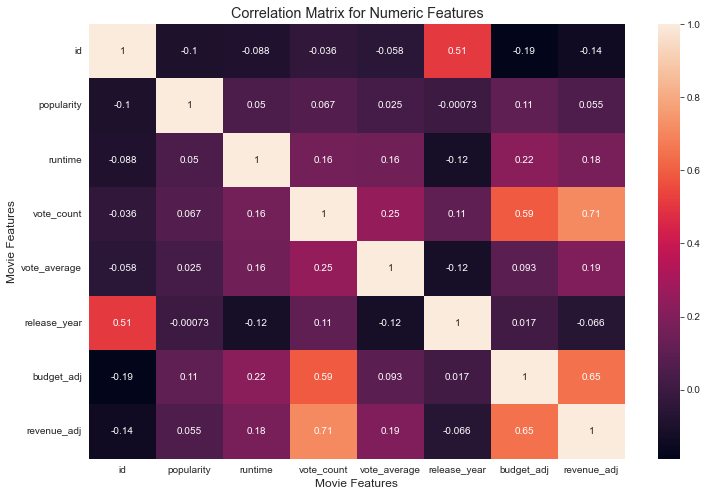

In [38]:
# Visualizing the correlation matrix 

correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True) # set annot = True to show correlation values
plt.title('Correlation Matrix for Numeric Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

The heatmap correlation visual measures the degree of correlation using colors (the darker the color, the lower the correlation value, or the lighter the color, the higher the correlation value) with 1 being the highest and -1 the lowest.

There is a strong positive correlation between vote_count and budget_adj
There is also a strong positive correlation between budget_adj and revenue_adj
Another notable relationship is a strong positive correlation between id and release year.

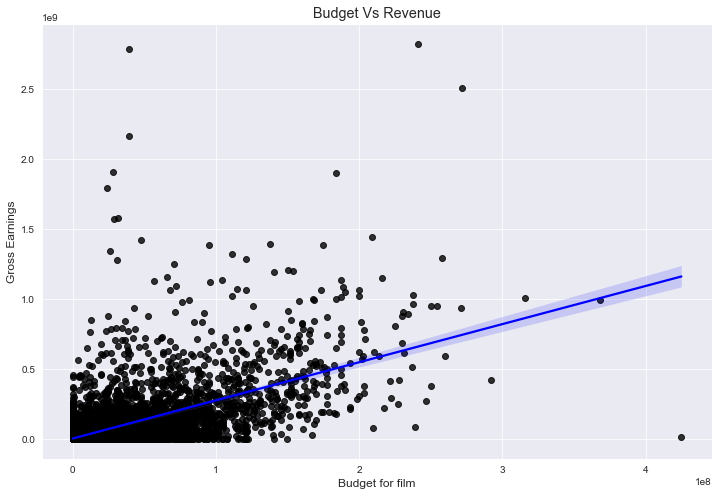

In [39]:
# regression plot of budget vs revenue using seaborn

sns.regplot(x='budget_adj', y='revenue_adj', data=df,
            scatter_kws={"color": "black"}, line_kws={"color": "blue"})
plt.title('Budget Vs Revenue')
plt.xlabel('Budget for film')
plt.ylabel('Gross Earnings')
plt.show()

Used regplot to show the regression line in a scatterplot, it is clear that there is a strong positive correlation between budget and revenue.

In [40]:
# check for pairs having correlation >= x

correlation_mat = df.corr()
corr_pairs = correlation_mat.unstack()
sorted_pairs = corr_pairs.sort_values()
z = float(input('pairs having correlation greater or equal: '))
sorted_pairs[(sorted_pairs)>z]

pairs having correlation greater or equal: 0.5


release_year  id              0.511393
id            release_year    0.511393
vote_count    budget_adj      0.587062
budget_adj    vote_count      0.587062
revenue_adj   budget_adj      0.646627
budget_adj    revenue_adj     0.646627
vote_count    revenue_adj     0.707941
revenue_adj   vote_count      0.707941
id            id              1.000000
release_year  release_year    1.000000
vote_average  vote_average    1.000000
vote_count    vote_count      1.000000
runtime       runtime         1.000000
popularity    popularity      1.000000
budget_adj    budget_adj      1.000000
revenue_adj   revenue_adj     1.000000
dtype: float64

The output above shows the result for feature pairs having a correlation value greater or equal to 0.5

###### CONCLUSION

Through various exploratory analysis carried out, a lot of information have been derived from the IMDB Movie dataset.
In conclusion, here are some key findings and discoveries:

-_Most movies have Drama, Comedy, or Thriller in their genre.                                                                   
-Most movies with high revenue are found to have Action, Adventures, Drama, or Comedy genre. production companies that want to   make high revenue should consider these genres.                                                                                -Most movies have a runtime below 200 monutes, that is below 1 hour 40 minutes.                                                 
-Most movies have a vote average below 7.0 with about 77% of movies below 7.0.                                                  -Most movies have a vote count less than 1,000.                                                                                 
-Most movies have budget less than 50,000,000 dollars.                                                                          -Most movies have revenue less than 250,000,000 dollars.                                                                        -There is a strong positive correlation between revenue_adj and vote_count, that is, the higher the revenue, the higher the       vote count and vice versa.                                                                                                    -There is also a strong positive correlation between budget and revenue, that is, the higher the budget, the higher the revenue made, if companies want to make more on movies, a recommendation would be to have a high budget._ 

###### LIMITATIONS
1. A limitation I came across was in the popularity column as there were quite a number of outliers as about 90% of the data was below 1 and the maximum value being about 32. I tried to tackle this problem by normalizing the values in the column.
2. Another limitation I came across was in columns 'cast', 'director', 'genre', and 'production_companies' as their values was separated by pipes ('|'). I tried to overcome this limitation by splitting the values separated by pipes and then exploding the copy of the original dataset